In [9]:
module TSPAppro

using LinearAlgebra
using Combinatorics
using Random
using Plots
gr()

export TSG, DEPOT, visualize

const DEPOT = [0.0, 0.0]

struct TSG
    points::Array{Float64, 2}
end

function visualize(game)
    f = plot(size=(500, 500), aspect=:equal)
    scatter!(f, [DEPOT[1]], [DEPOT[2]], color=:red, label=nothing)
    scatter!(f, game.points[:, 1], game.points[:, 2], color=:blue, marker=:rect, label=nothing)
    f
end


"""
    naive computation of the Shapley values of the given TSG
"""
function appro(game; max_trial=10)
    n = size(game.points, 1)
    values = zeros(n)
    
    # distance matrix
    Ddepot = zeros(n)
    D = zeros(n, n)
    for i in 1:n
        Ddepot[i] = norm(DEPOT .- game.points[i, :])
    end
    for i in 1:n, j in i+1:n
        D[i, j] = D[j, i] = norm(game.points[i, :] .- game.points[j, :])
    end
    
    # cache of TSP
    cacheTSP = Dict()
    cacheTSP[[]] = 0.0
    function solve_tsp(N)
        if !haskey(cacheTSP, N)
            if length(N) == 1
                cacheTSP[N] = 2 * Ddepot[N[1]]
            else
                mincost = Inf
                for perm in permutations(N)
                    cost = 0.0
                    for i in 1:length(perm) - 1
                        cost += D[perm[i], perm[i + 1]]
                    end
                    cost += Ddepot[perm[1]]
                    cost += Ddepot[perm[end]]
                    if mincost > cost
                        mincost = cost
                    end
                end
                cacheTSP[N] = mincost
            end
        end
        cacheTSP[N]
    end
    
    # random
    # mm = min(factorial(n), max_trial)
    for i in 1:n
        for _ in 1:max_trial
            πi = randperm(n)
            j = findfirst(k -> k == i, πi)
            Sj = sort(πi[1:j-1])
            Sj1 = sort(πi[1:j])
            cj = solve_tsp(Sj)
            cj1 = solve_tsp(Sj1)
            term1 = (cj1 - cj) / max_trial
            values[i] += (cj1 - cj) / max_trial
        end
    end
    values
end


end

using Main.TSPAppro

[6.3963339710781995, 1.211495276832769, 2.4735666968954204]


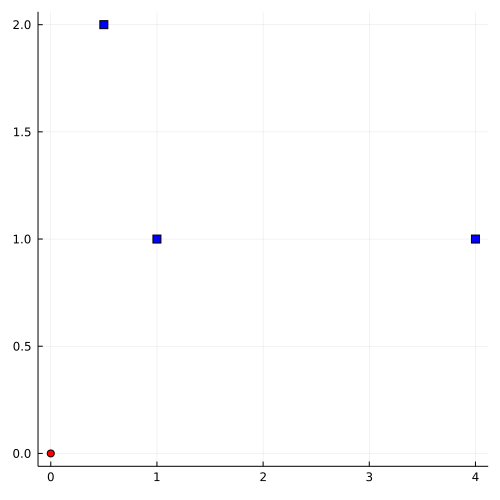

In [10]:
tsg = TSG([4.0 1.0; 1.0 1.0; 0.5 2.0])
sol = TSPAppro.appro(tsg, max_trial=100)
println(sol)
TSPAppro.visualize(tsg)